In [48]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.formula.api import ols
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

import xgboost as xgb

%matplotlib inline

import clean 

In [49]:
draft = ['nfl-combine/2000Defense.csv',
'nfl-combine/2001Defense.csv',
'nfl-combine/2001Offense.csv',
'nfl-combine/2002Defense.csv',
'nfl-combine/2002Offense.csv',
'nfl-combine/2003Defense.csv',
'nfl-combine/2003Offense.csv',
'nfl-combine/2004Offense.csv',
'nfl-combine/2005Defense.csv',
'nfl-combine/2005Offense.csv',
'nfl-combine/2006Defense.csv',
'nfl-combine/2006Offense.csv',
'nfl-combine/2007Defense.csv',
'nfl-combine/2007Offense.csv',
'nfl-combine/2008Defense.csv',
'nfl-combine/2008Offense.csv',
'nfl-combine/2009Defense.csv',
'nfl-combine/2009Offense.csv',
'nfl-combine/2010Defense.csv',
'nfl-combine/2010Offense.csv',
'nfl-combine/2011Defense.csv',
'nfl-combine/2011Offense.csv',
'nfl-combine/2012Defense.csv',
'nfl-combine/2012Offense.csv',
'nfl-combine/2013Defense.csv',
'nfl-combine/2013Offense.csv',
'nfl-combine/2014Defense.csv',
'nfl-combine/2014Offense.csv',
'nfl-combine/2015Defense.csv',
'nfl-combine/2015Offense.csv',
'nfl-combine/2016Defense.csv',
'nfl-combine/2016Offense.csv',
'nfl-combine/2017Defense.csv',
'nfl-combine/2017Offense.csv']

In [50]:
df = clean.read_and_concat(draft)

In [51]:
df = clean.clean_data(df)

In [52]:
df.head()

,Height,Wt,Forty,Vertical,BenchReps,Broad_Jump,Cone,Shuttle,Drafted,pos_DE,...,pos_LS,pos_OG,pos_OLB,pos_OT,pos_P,pos_QB,pos_RB,pos_SS,pos_TE,pos_WR
0,75,191,4.53,33.0,0.0,130.0,7.09,4.18,0,0,...,0,0,0,0,0,0,0,0,0,1
1,75,229,4.91,34.0,0.0,108.0,7.71,4.59,1,0,...,0,0,0,0,0,1,0,0,0,0
2,71,180,4.59,36.0,0.0,123.0,7.22,4.16,1,0,...,0,0,0,0,0,0,0,0,0,1
3,76,332,5.26,29.0,28.0,97.0,7.78,4.72,1,0,...,0,0,0,1,0,0,0,0,0,0
4,71,193,4.50,0.0,0.0,0.0,0.00,0.00,1,0,...,0,0,0,0,0,0,1,0,0,0


In [53]:
tests = ['Forty', 'Vertical', 'BenchReps', 'Broad_Jump', 'Cone', 'Shuttle']
timed = ['Forty', 'Cone', 'Shuttle']
reps = ['BenchReps']
dist = ['Vertical', 'Broad_Jump']

In [54]:
# Number of players that skipped each event
for i in tests:
    print(f"{i}: {len(df.loc[df[i]==0])}")

Forty: 83
Vertical: 1173
BenchReps: 1762
Broad_Jump: 1213
Cone: 1876
Shuttle: 1824


In [55]:
df.groupby('Drafted').mean()

,Height,Wt,Forty,Vertical,BenchReps,Broad_Jump,Cone,Shuttle,pos_DE,pos_DT,...,pos_LS,pos_OG,pos_OLB,pos_OT,pos_P,pos_QB,pos_RB,pos_SS,pos_TE,pos_WR
Drafted,,,,,,,,,,,,,,,,,,,,,
0,73.648497,239.965869,4.731788,24.796994,12.866021,86.151808,4.723953,2.908833,0.067753,0.056037,...,0.007132,0.082527,0.049414,0.072848,0.041773,0.069791,0.105451,0.036169,0.058584,0.164035
1,73.840068,243.892715,4.681258,26.500000,14.824132,90.429425,4.811360,2.932860,0.087649,0.084804,...,0.001423,0.057769,0.080820,0.083665,0.007684,0.055208,0.085942,0.038133,0.058338,0.139727


In [9]:
df.groupby(['Pos', 'Drafted']).mean()

Height          Wt     Forty   Vertical  BenchReps  \
Pos Drafted                                                          
CB  0        70.891720  191.751592  4.524841  30.675159  10.923567   
    1        71.136476  193.585608  4.460124  29.818859  11.588089   
DE  0        75.669173  267.052632  4.783158  22.883459  18.052632   
    1        75.805195  269.331169  4.776071  26.636364  18.678571   
DT  0        74.672727  302.400000  5.032545  24.163636  22.709091   
    1        74.912752  307.469799  5.011577  22.016779  20.939597   
FB  0        72.640000  246.240000  4.801000  27.410000  18.980000   
    1        72.393939  243.454545  4.733182  28.409091  19.560606   
FS  0        71.905405  202.108108  4.552027  28.222973  11.621622   
    1        72.583942  206.810219  4.436204  29.835766  14.167883   
ILB 0        73.146067  241.370787  4.660112  25.134831  15.977528   
    1        73.306748  241.858896  4.574294  26.355828  18.220859   
LS  0        74.642857  250.571429  5.007143   3.892857   8.571429   
    1        74.400000  238.600000  4.976000  23.500000  13.200000   
OG  0        75.981481  314.456790  5.371852  21.598765  19.401235   
    1        75.970443  314.561576  5.256059  22.339901  22.497537   
OLB 0        73.639175  239.422680  4.742577  25.458763  15.948454   
    1        73.887324  241.419014  4.629824  28.971831  18.690141   
OT  0        77.699301  314.839161  5.220070  20.286713  17.503497   
    1        77.554422  315.942177  5.160272  23.591837  20.370748   
P   0        73.743902  211.780488  3.972195   1.097561   0.621951   
    1        74.518519  221.185185  4.190741   1.129630   2.444444   
QB  0        74.211679  220.773723  4.814891  27.660584   1.416058   
    1        75.097938  224.443299  4.711392  24.172680   0.798969   
RB  0        70.246377  212.173913  4.558744  27.478261  14.753623   
    1        70.675497  215.761589  4.490695  28.135762  14.807947   
SS  0        72.169014  211.154930  4.557042  28.591549  13.985915   
    1        72.082090  210.559701  4.372313  27.947761  14.462687   
TE  0        76.260870  254.539130  4.710609  24.300000  15.643478   
    1        76.307317  254.668293  4.645415  26.439024  16.829268   
WR  0        72.807453  201.627329  4.520435  28.406832   6.232919   
    1        72.621181  201.680244  4.433544  28.272912   6.549898   

             Broad_Jump      Cone   Shuttle  
Pos Drafted                                  
CB  0        101.286624  4.280000  2.646624  
    1        102.019851  4.550546  2.808561  
DE  0         81.736842  4.961429  3.037293  
    1         91.139610  5.113929  3.090714  
DT  0         84.218182  5.884273  3.607091  
    1         76.248322  4.977383  3.057349  
FB  0         94.700000  5.158800  3.102000  
    1         97.969697  5.825909  3.486061  
FS  0         94.527027  4.690270  2.915270  
    1         97.474453  4.634745  2.714891  
ILB 0         90.449438  4.142022  2.689888  
    1         89.319018  4.306871  2.684540  
LS  0         22.857143  0.000000  0.000000  
    1         68.600000  2.816000  1.742000  
OG  0         75.598765  5.785000  3.580556  
    1         79.729064  5.904631  3.655764  
OLB 0         92.546392  4.918144  3.047732  
    1        100.433099  5.057007  3.061303  
OT  0         70.783217  5.191538  3.198182  
    1         83.125850  5.975136  3.681327  
P   0          2.670732  0.000000  0.000000  
    1          4.444444  0.000000  0.000000  
QB  0         98.335766  5.982555  3.752117  
    1         87.355670  5.254948  3.163351  
RB  0         94.695652  4.223092  2.528599  
    1         95.046358  4.095364  2.430166  
SS  0        102.971831  4.866056  2.994648  
    1         94.462687  4.114552  2.375522  
TE  0         85.026087  4.606000  2.759478  
    1         89.268293  4.889854  2.983463  
WR  0         97.052795  4.952702  3.053137  
    1         92.187373  4.231731  2.630367

# Statistic Tests

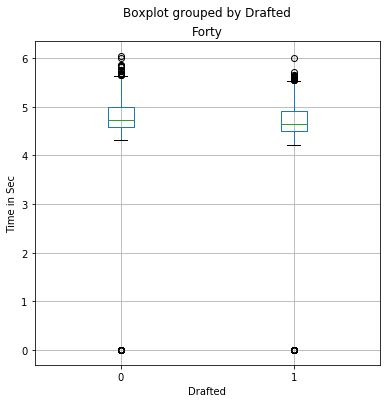

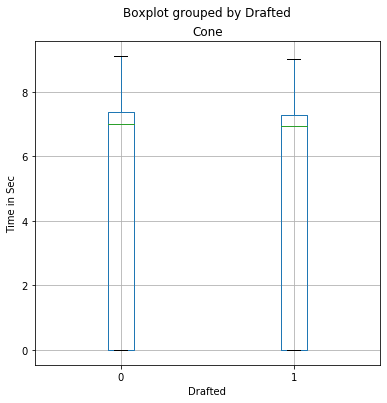

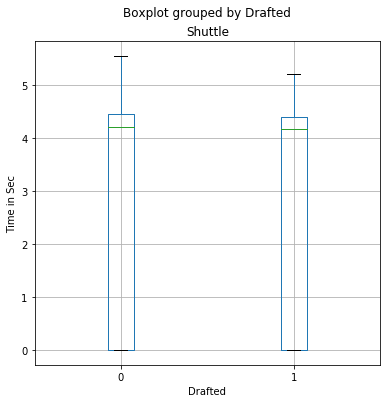

In [21]:
for col in timed:
    ax =df.boxplot(col, by='Drafted', figsize=(6,6))
    ax.set_ylabel("Time in Sec")

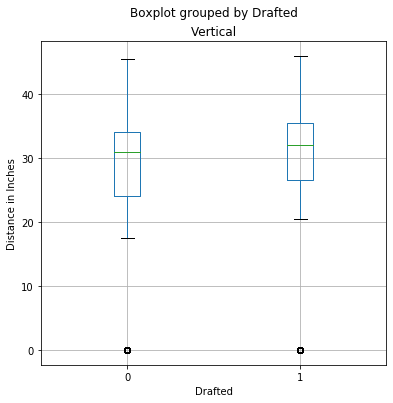

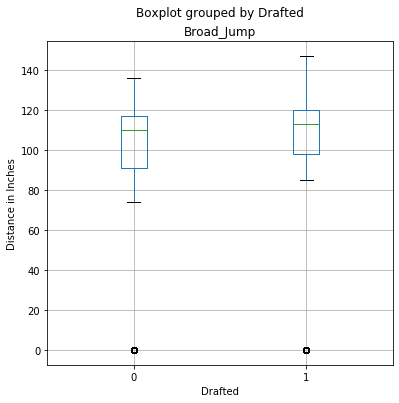

In [22]:
for col in dist:
    ax =df.boxplot(col, by='Drafted', figsize=(6,6))
    ax.set_ylabel("Distance in Inches")

Text(0, 0.5, 'Number of Repetition')

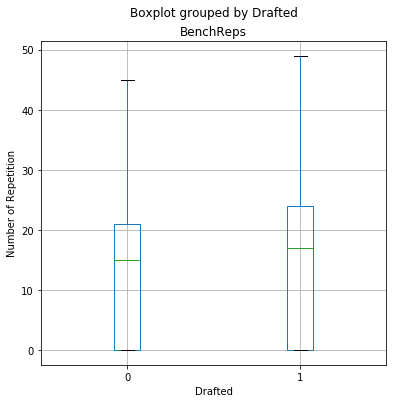

In [23]:
ax =df.boxplot('BenchReps', by='Drafted', figsize=(6,6))
ax.set_ylabel("Number of Repetition")

In [10]:
# ANOVA
anova_skills = ols('Drafted ~ Vertical + BenchReps + Broad_Jump + Shuttle + Forty + Cone', data=df).fit()
anova_table = sm.stats.anova_lm(anova_skills, type=2)
print(anova_table)

                df       sum_sq   mean_sq          F        PR(>F)
Vertical       1.0     4.278125  4.278125  18.841204  1.446269e-05
BenchReps      1.0     7.325954  7.325954  32.264087  1.415194e-08
Broad_Jump     1.0     0.696609  0.696609   3.067923  7.990748e-02
Shuttle        1.0     2.789044  2.789044  12.283172  4.607227e-04
Forty          1.0     2.255311  2.255311   9.932570  1.632566e-03
Cone           1.0     0.070127  0.070127   0.308844  5.784133e-01
Residual    5470.0  1242.030147  0.227062        NaN           NaN


In [31]:
draftcorr1

Height        0.034558
Wt            0.042185
Forty        -0.036979
Vertical      0.058282
BenchReps     0.085115
Broad_Jump    0.042646
Cone          0.012090
Shuttle       0.005545
pos_DE        0.035064
pos_DT        0.052537
pos_FB       -0.022278
pos_FS        0.003213
pos_ILB       0.002397
pos_LS       -0.046562
pos_OG       -0.047603
pos_OLB       0.059195
pos_OT        0.019144
pos_P        -0.117047
pos_QB       -0.029347
pos_RB       -0.032221
pos_SS        0.004962
pos_TE       -0.000502
pos_WR       -0.032786
Name: Drafted, dtype: float64

Text(0.5, 1.0, 'Correlation between Feature and being Drafted')

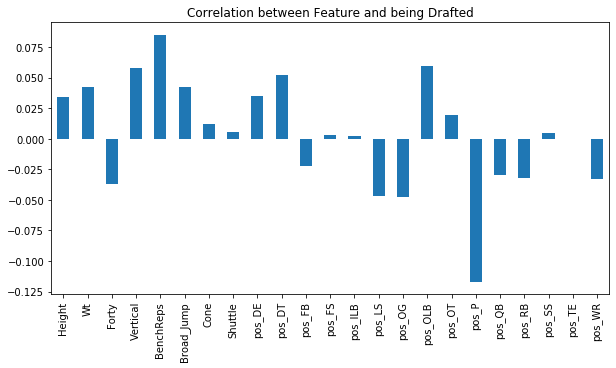

In [28]:
corr = df.corr()
draftcorr = corr['Drafted']
draftcorr1 = draftcorr.drop(index= "Drafted")
ax = draftcorr1.plot(kind = 'bar', x = draftcorr.drop(columns = ['Drafted']))
ax.set_title('Correlation between Feature and being Drafted')

/Users/michaelarmistead/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/michaelarmistead/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


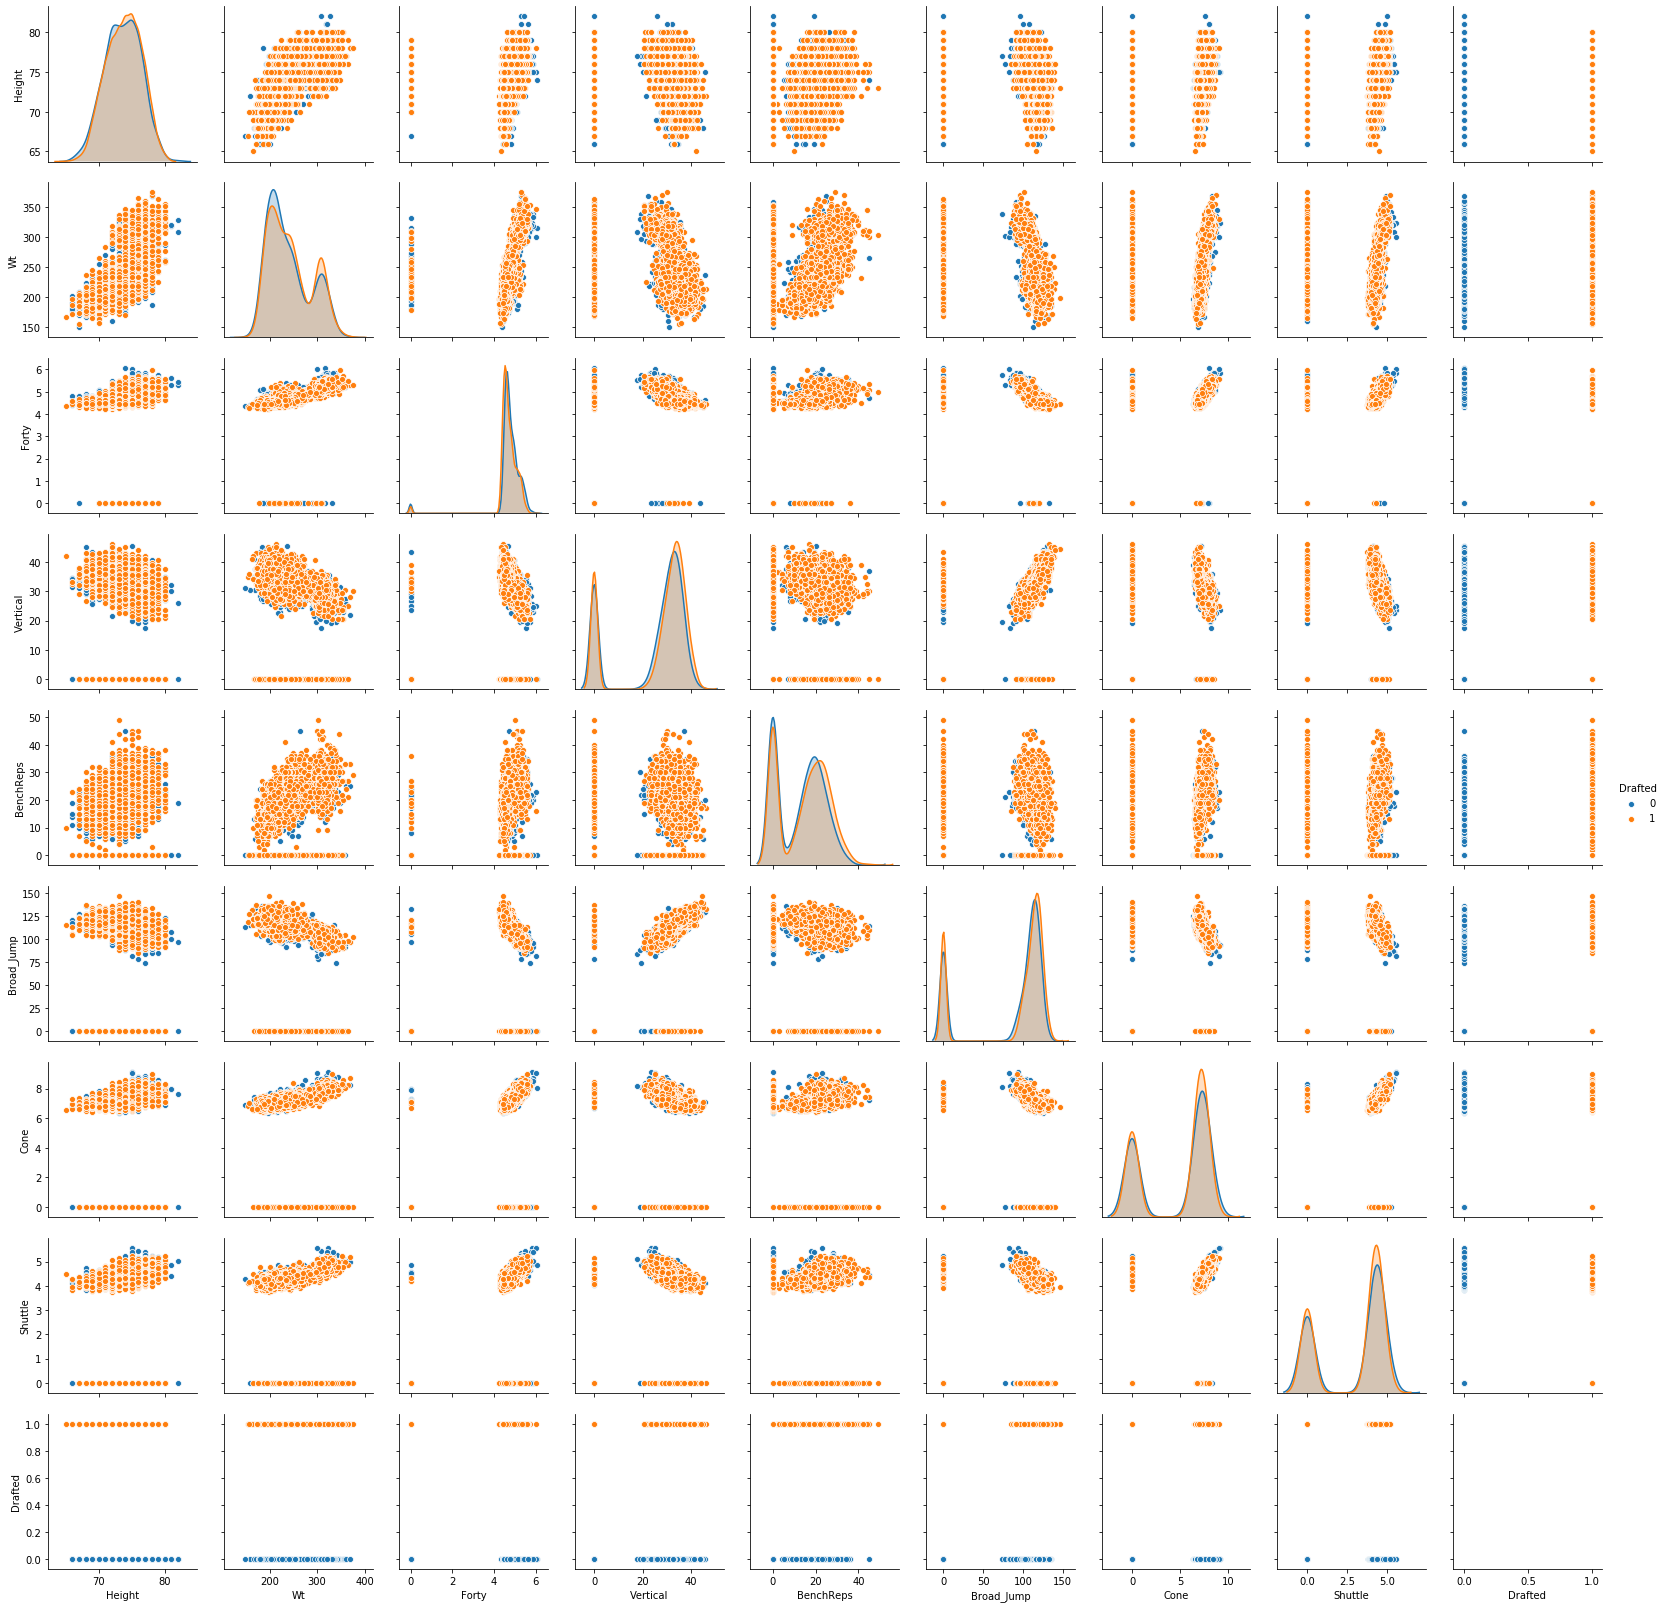

In [18]:
sns.pairplot(df2, hue = 'Drafted')

In [68]:
# baseline for accuracy 

print(f"Need models to have an accuracy score greater than {round(len(df2.loc[df2['Drafted']==1])/len(df)*100,2)}%") 


Need models to have an accuracy score greater than 64.16%


# Modeling

## KNN

In [13]:
X = df.drop(columns = ['Drafted'])
y = df['Drafted']
X_train, X_test, y_train,  y_test  = train_test_split(X, y, random_state = 2)

In [56]:
minmax = MinMaxScaler()
minmax.fit(X_train)

X_trainmm = minmax.transform(X_train)
X_testmm = minmax.transform(X_test)

In [61]:
scaler = StandardScaler()
scaler.fit(X_train)

X_trainstand = scaler.transform(X_train)
X_teststand = scaler.transform(X_test)

In [58]:
# not scaled
knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(X_train, y_train)
y_pred =knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)
print(accuracy, test_f1)

0.6175182481751825 0.720384204909285


In [59]:
# min max
knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(X_trainmm, y_train)
y_pred =knn.predict(X_testmm)
accuracy = accuracy_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)
print(accuracy, test_f1)

0.6204379562043796 0.7207303974221267


In [66]:
# standardized 
knn = KNeighborsClassifier(n_neighbors= 17)
knn.fit(X_trainstand, y_train)
y_pred =knn.predict(X_teststand)
accuracy = accuracy_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)
print(accuracy, test_f1)

0.6642335766423357 0.7745098039215687


In [70]:
# k=17 is best fit
k_scores =[]

k_range = list(range(3,20))
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(X_trainstand, y_train)
    
    y_pred =knn.predict(X_teststand)
    
    test_f1 = f1_score(y_test, y_pred)
    
    k_scores.append(test_f1)
print(k_scores)

[0.7325456498388829, 0.6781883194278904, 0.7457805907172995, 0.708215297450425, 0.7575602255253715, 0.730958904109589, 0.7644982349974785, 0.7453482190324295, 0.7690773067331671, 0.7502601456815816, 0.7719644619940769, 0.7601438109912686, 0.7728174603174605, 0.7626339969372129, 0.7745098039215687, 0.7603222557905338, 0.7733463035019457]


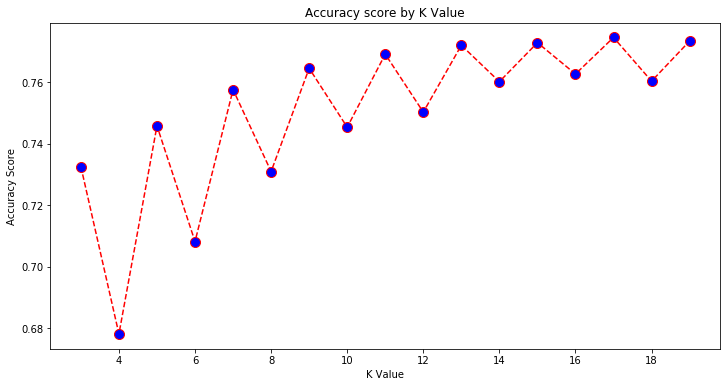

In [69]:
plt.figure(figsize=(12, 6))  
plt.plot(k_range, k_scores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy score by K Value')  
plt.xlabel('K Value')  
plt.ylabel('Accuracy Score') 
plt.show()

In [62]:
# best score for knn
knn = KNeighborsClassifier(n_neighbors= 17)
knn.fit(X_trainstand, y_train)
y_pred =knn.predict(X_teststand)
accuracy = accuracy_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)
print(accuracy, test_f1)

0.6642335766423357 0.7745098039215687


## Random Forest

In [14]:
# fitted hyperparameters
clf = RandomForestClassifier( random_state=2, max_depth = 9, max_features = 3, max_leaf_nodes = 150, min_samples_leaf = 3, min_samples_split = 2, n_estimators = 100)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
f1 = f1_score(y_test, preds)
accuracy = accuracy_score(y_test, preds)
print(accuracy, f1)

0.6912408759124088 0.7996210326859309


In [102]:
clf_cv = RandomForestClassifier(random_state=2, max_depth = 9, max_features = 3, max_leaf_nodes = 150)
param_dist = { 'class_weight': ('balance', None),
    'n_estimators': (100, 80, 110),
    'min_samples_split': (8, 11, 15, 20),
    'min_samples_leaf': (3,4,5),
    'min_samples_split': (2,3,4)
    }


In [103]:
gsearchrf = GridSearchCV(
    estimator = clf_cv,
    param_grid = param_dist,
    scoring='f1',
    n_jobs=-1,
    verbose=1,
    iid=False,
    cv=5)

gsearchrf.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   21.1s finished
/Users/michaelarmistead/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=9,
                                              max_features=3,
                                              max_leaf_nodes=150,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=2,
                                            

In [104]:
gsearchrf.best_params_

{'class_weight': None,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 110}

In [31]:
gsearchrf.best_params_

{'max_depth': 9,
 'max_features': 3,
 'max_leaf_nodes': 150,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 100}

In [35]:
gsearchrf.best_score_

0.796508333043857

In [105]:
preds = gsearchrf.best_estimator_.predict(X_test)
test_f1 = f1_score(y_test, preds)
test_acc = accuracy_score(y_test, preds)
print("Accuracy: %f" % (test_acc))
print("F1: %f" % (test_f1))

Accuracy: 0.690511
F1: 0.798861


## Logistic Regression

In [15]:
logreg = LogisticRegression(random_state = 2)

logreg.fit(X_train, y_train)

/Users/michaelarmistead/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
pred = logreg.predict(X_test)
f1 = f1_score(y_test, pred)
test_acc = accuracy_score(y_test, preds)
print(f"accuracy: {test_acc}, f1:{f1}")

accuracy: 0.6912408759124088, f1:0.7837837837837838


In [37]:
logreg_cv = LogisticRegression(random_state=2)
param_dist = { 'class_weight': ('balance', None),
    'C': (.5, 1),
    'max_iter': (75, 100, 125)
    }


In [38]:
gsearchrf = GridSearchCV(
    estimator = logreg_cv,
    param_grid = param_dist,
    scoring='f1',
    n_jobs=-1,
    verbose=1,
    iid=False,
    )

gsearchrf.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
/Users/michaelarmistead/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/michaelarmistead/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=2, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid=False, n_jobs=-1,
             param_grid={'C': (0.5, 1), 'class_weight': ('balance', None),
                         'max_iter': (75, 100, 125)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=1)

In [39]:
gsearchrf.best_params_

{'C': 1, 'class_weight': 'balance', 'max_iter': 75}

In [41]:
preds = gsearchrf.best_estimator_.predict(X_test)
test_f1 = f1_score(y_test, preds)
test_acc = accuracy_score(y_test, preds)
print("Accuracy: %f" % (test_acc))
print("F1: %f" % (test_f1))

Accuracy: 0.651825
F1: 0.783477


##  XGBoost

In [27]:
clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic', random_state = 2, colsample_bytree = .5, learning_rate = .1, max_delta_step= .7, min_child_weight=1, max_depth = 6, n_estimators = 20)
param_dist = {
             'max_depth': (5,6,7),
             'n_estimators': (20,19, 18,21,22),
             }

In [28]:
gsearch1 = GridSearchCV(
    estimator = clf_xgb,
    param_grid = param_dist,
    scoring='f1',
    verbose=1,
    iid=False,
    n_jobs = -1,
    cv=5)

gsearch1.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    5.8s finished
/Users/michaelarmistead/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.5, gamma=0,
                                     learning_rate=0.1, max_delta_step=0.7,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=2, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid=False, n_jobs=-1,
             param_grid={'max_depth': (5, 6, 7),
                         'n_estimators': (20, 19, 18, 21, 22)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=

In [29]:
gsearch1.best_params_

{'max_depth': 6, 'n_estimators': 20}

In [35]:
preds = gsearch1.best_estimator_.predict(X_test)
test_f1 = f1_score(y_test, preds)
test_acc = accuracy_score(y_test, preds)
print("Accuracy: %f" % (test_acc))
print("F1: %f" % (test_f1))

Accuracy: 0.705839
F1: 0.800791


### Final Model

In [24]:
clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic', random_state = 2, colsample_bytree = .5, learning_rate = .1, max_delta_step= .7, min_child_weight=1, max_depth = 6, n_estimators = 20)
clf_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0,
              learning_rate=0.1, max_delta_step=0.7, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=20, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=2,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [25]:
preds = clf_xgb.predict(X_test)
f1= f1_score(y_test, preds)
acc = accuracy_score(y_test, preds)
print("Accuracy: %f" % (acc))
print("F1: %f" % (f1))

Accuracy: 0.705839
F1: 0.800791


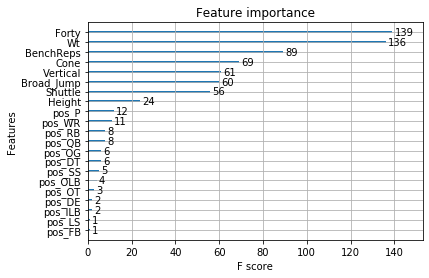

In [26]:
xgb.plot_importance(clf_xgb)
plt.rcParams['figure.figsize'] = [10,5]
plt.show()

## DF 3 with selection features

Height/weight ratio

In [31]:
df3 = df2
df3['H/W_Ratio']= df3['Height']/df2['Wt']
df3 = df3.drop(columns = ['Height', 'Wt'])
df3.head()

,Forty,Vertical,BenchReps,Broad_Jump,Cone,Shuttle,Drafted,pos_DE,pos_DT,pos_FB,...,pos_OG,pos_OLB,pos_OT,pos_P,pos_QB,pos_RB,pos_SS,pos_TE,pos_WR,H/W_Ratio
0,4.53,33.0,0.0,130.0,7.09,4.18,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.392670
1,4.91,34.0,0.0,108.0,7.71,4.59,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0.327511
2,4.59,36.0,0.0,123.0,7.22,4.16,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0.394444
3,5.26,29.0,28.0,97.0,7.78,4.72,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0.228916
4,4.50,0.0,0.0,0.0,0.00,0.00,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0.367876


In [117]:
len(df3.columns)

23

## df3 KNN

In [32]:
X3 = df3.drop(columns = ['Drafted'])
y3 = df3['Drafted']
X_train3, X_test3, y_train3,  y_test3  = train_test_split(X3, y3, random_state = 2)

In [115]:
# minmax = MinMaxScaler()
# minmax.fit(X_train3)

# X_trainmm = minmax.transform(X_train3)
# X_testmm = minmax.transform(X_test3)

# scaler = StandardScaler()
# scaler.fit(X_train3)

# X_trainstand = scaler.transform(X_train3)
# X_teststand = scaler.transform(X_test3)

# # not scaled
# knn = KNeighborsClassifier(n_neighbors= 3)
# knn.fit(X_train3, y_train3)
# y_pred =knn.predict(X_test3)
# accuracy = accuracy_score(y_test3, y_pred)
# test_f1 = f1_score(y_test3, y_pred)
# print(f"not scaled acurracy:{accuracy}, f1:{test_f1}")

# # min max
# knn = KNeighborsClassifier(n_neighbors= 3)
# knn.fit(X_trainmm, y_train3)
# y_pred =knn.predict(X_testmm)
# accuracymm = accuracy_score(y_test3, y_pred)
# test_f1mm = f1_score(y_test3, y_pred)
# print(f"min max acurracy:{accuracymm}, f1:{test_f1mm}")

# standardized 
knn = KNeighborsClassifier(n_neighbors= 20)
knn.fit(X_trainstand, y_train3)
y_pred =knn.predict(X_teststand)
accuracys = accuracy_score(y_test3, y_pred)
test_f1s = f1_score(y_test3, y_pred)
print(f"standardized acurracy:{accuracys}, f1:{test_f1s}")

standardized acurracy:0.6664233576642336, f1:0.7702362996480643


In [111]:
# k=17 is best fit
k_scores =[]

k_range = list(range(3,20))
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(X_trainstand, y_train3)
    
    y_pred =knn.predict(X_teststand)
    
    test_f1 = f1_score(y_test3, y_pred)
    
    k_scores.append(test_f1)
print(k_scores)

[0.7295392953929539, 0.6589665653495441, 0.7401069518716578, 0.7037681159420289, 0.7509062661833247, 0.7304925290536803, 0.7636549259826442, 0.7443609022556391, 0.7776096822995462, 0.7586568730325288, 0.7722969606377679, 0.7563111798042246, 0.772189349112426, 0.7638395124428644, 0.7785959744722633, 0.7782805429864252, 0.7875546912980068]


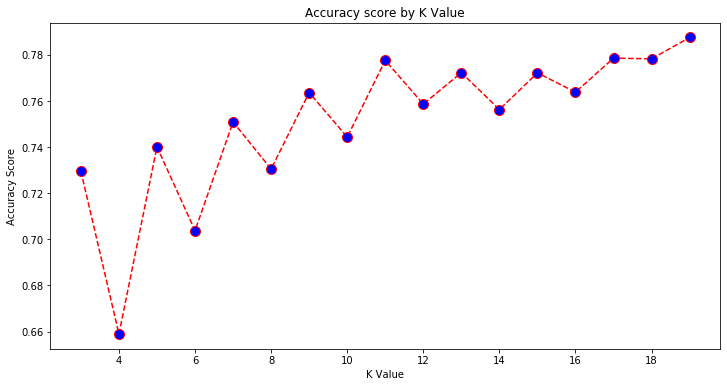

In [112]:
plt.figure(figsize=(12, 6))  
plt.plot(k_range, k_scores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy score by K Value')  
plt.xlabel('K Value')  
plt.ylabel('Accuracy Score') 
plt.show()

In [113]:
# k=17 is best fit
k_scores =[]

k_range = list(range(3,20))
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(X_trainmm, y_train3)
    
    y_pred =knn.predict(X_testmm)
    
    test_f1 = f1_score(y_test3, y_pred)
    
    k_scores.append(test_f1)
print(k_scores)

[0.7305002689618074, 0.6743761412051126, 0.7337593184238552, 0.6939953810623557, 0.749611197511664, 0.7110621904237754, 0.7553516819571866, 0.7332259796027912, 0.7723169508525576, 0.7533960292580982, 0.7691547207118142, 0.7563111798042246, 0.7724609375, 0.759175465057818, 0.7728155339805824, 0.7629482071713147, 0.7744433688286544]


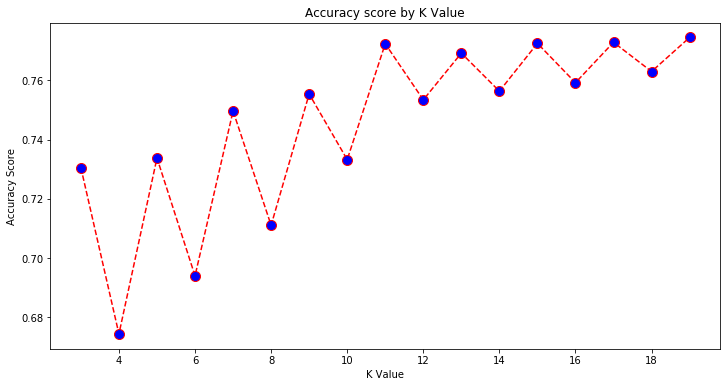

In [114]:
plt.figure(figsize=(12, 6))  
plt.plot(k_range, k_scores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy score by K Value')  
plt.xlabel('K Value')  
plt.ylabel('Accuracy Score') 
plt.show()

## df3 Random Forest

In [116]:
clf3 = RandomForestClassifier(random_state=2,)
clf.fit(X_train3, y_train3)
preds = clf.predict(X_test3)
f1 = f1_score(y_test3, preds)
accuracy = accuracy_score(y_test, preds)
print(accuracy, f1)

0.689051094890511 0.7986767485822305


In [131]:
clf_cv = RandomForestClassifier(random_state=2, max_depth = 7, min_samples_leaf = 3, min_samples_split = 2, max_features = 4)
param_dist = {
    'n_estimators': (450, 500, 550),
    'max_leaf_nodes': (45,50,55)}

In [132]:
gsearchrf = GridSearchCV(
    estimator = clf_cv,
    param_grid = param_dist,
    scoring='f1',
    n_jobs=-1,
    verbose=1,
    iid=False,
    cv=5)

gsearchrf.fit(X_train3, y_train3)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   29.3s finished
/Users/michaelarmistead/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=7,
                                              max_features=4,
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=3,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=2,
                                           

In [129]:
gsearchrf.best_params_

{'max_leaf_nodes': 50, 'n_estimators': 600}

In [133]:
gsearchrf.best_params_

{'max_leaf_nodes': 50, 'n_estimators': 550}

In [134]:
preds = gsearchrf.best_estimator_.predict(X_test3)
test_f1 = f1_score(y_test3, preds)
test_acc = accuracy_score(y_test3, preds)
print("Accuracy: %f" % (test_acc))
print("F1: %f" % (test_f1))

Accuracy: 0.672263
F1: 0.791066


## DF3 Logistic

In [172]:
logreg = LogisticRegression(random_state = 2, solver = 'liblinear')

logreg.fit(X_train3, y_train3)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [173]:
pred = logreg.predict(X_test3)
f1 = f1_score(y_test3, pred)
test_acc = accuracy_score(y_test3, preds)
print(f"accuracy: {test_acc}, f1:{f1}")

accuracy: 0.6722627737226278, f1:0.7855530474040632


## DF3 XGBoost

In [33]:
clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic', random_state = 2, colsample_bytree = .5, learning_rate = .1, max_delta_step= .7, min_child_weight=1, max_depth = 6, n_estimators = 20)
clf_xgb.fit(X_train3, y_train3)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0,
              learning_rate=0.1, max_delta_step=0.7, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=20, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=2,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [34]:
pred = clf_xgb.predict(X_test3)
f1 = f1_score(y_test3, pred)
test_acc = accuracy_score(y_test3, preds)
print(f"accuracy: {test_acc}, f1:{f1}")

accuracy: 0.7058394160583942, f1:0.7994310099573257
